# IFRS17 CSM Waterfall Chart Notebook
To run this notebook and get all the outputs below, Go to the **Cell** menu above, and then click **Run All**.


Click the badge below to run this notebook online on Google Colab. You need a Google account and need to be logged in to it to run this notebook on Google Colab.
[![Run on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lifelib-dev/lifelib/blob/current/lifelib/projects/ifrs17sim/ifrs17sim_csm_waterfall.ipynb)


The next code cell below is relevant only when you run this notebook on Google Colab. It installs lifelib and creates a copy of the library for this notebook.

In [ ]:
import sys, os

if 'google.colab' in sys.modules:
    lib = 'ifrs17sim'; lib_dir = '/content/'+ lib
    if not os.path.exists(lib_dir):
        !pip install lifelib
        import lifelib; lifelib.create(lib, lib_dir)
        
    %cd $lib_dir

## About this notebook

This noteook demonstrates the usage of [ifrs17sim] project in [lifelib], by building and running a model and drawing a waterfall graph of CSM amortization on a single modelpoint.


[ifrs17sim]: https://lifelib.io/projects/ifrs17sim.html
[lifelib]: https://lifelib.io

<div class="alert alert-warning">

**Warning:**

The primary purpose of this model is to showcase the capability of [lifelib] and its base system [modelx], and less attention has been paid to the accuracy of the model or the compliance with the accounting standards. 
At very least, following items are identified as over-simplification or lack of implementation.

<ul>
  <li>The timing of cashflows is either the beginning or end of each step.</li>
  <li>All expenses are included in insurance cashflows.</li>
  <li>Loss component logic is not yet incorporated, so `CSM` can be negative.</li>
  <li>Coverage unit is set to sum assured</li>
  <li>Amortization of acquisition cash flows is not yet implemented.</li>
  <li>All insurance cashflows are considered non-market sensitive, i.e. no TVOG is considered.</li>
  <li>Risk adjustment is not yet modeled.</li>
</ul>

</div>

[modelx]: http://docs.modelx.io

## How to use Jupyter Notebook
Jupter notebook enables you to run a Python script piece by piece. You can run each piece of code (called a "cell") by putting the cursor in the cell and pressing **Shift + Enter**, and get the output right below the input code of the cell.

If you want to learn more about Jupyter Notebook, [this tutorial] will help you. There are also plenty of other resources on the internet as Jupyter Notebook is quite popular.

[this tutorial]: https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb

## The entire script
Below is the entire script of this example. The enire scipt is broken down to several parts in differenc cells, and each part is explained below. The pieces of code in cells below are executable one after another from the top.

```python
import collections
import pandas as pd
from draw_charts import draw_waterfall, get_waterfalldata
import modelx as mx

model = mx.read_model("model")
proj = model.OuterProj[1]

df = get_waterfalldata(
     proj,
     items=['CSM',
            'IntAccrCSM',
            'AdjCSM_FlufCF',
            'TransServices'],
     length=15,
     reverseitems=['TransServices'])

draw_waterfall(df)
```

## Initial set-up

The next few lines are import statements, by which functions defined in other modules become avaialbe in this script.

`ifrs17sim` and `draw_charts` modules are in the project directory of this project. To see what fiels are in the project directory, select **Open** from the **File** menu in the tool bar above.

In [1]:
import collections
import pandas as pd
from draw_charts import draw_waterfall, get_waterfalldata

## Building the model

The next line is to create a model from `build` function defined in `ifrs17sim` module which has just been imported. 

By supplying `True` to `load_saved` parameter of the `build` function, the input data is read from `ifrs17sim.mx`, the 'pickled' file to save loading time. To read input from `input.xlsm`, call `build` with `load_saved=False` or without any parameter because `False` is the default value of `load_saved`. 

If you run this code multiple time, the previous model is renamed to `ifrs17sim_BAK*`, and a new model is created and returned as `model`.

In [2]:
import modelx as mx
model = mx.read_model("model")

To see what space is inside `model`, execute `model.spaces` in an empty cell.
```python
model.spaces
```

## Calculating CSM

In `model` thre is a space called `OuterProj` and other spaces. `OuterProj` is parametrized by Policy ID, i.e. each of the spaces with parameters corresponds to a projection of one policy. For example, `model.OuterProj[1]` return the projection of policy ID 1, `model.OuterProj[171]` return the projection of policy ID 171.

The first line below sets `proj` as a shorthand for the projection of Policy ID 1. To see what cells are in `proj`, execute `proj.cells` in an empty cell. 
```python
proj.cells
```

You can change the sample policy to output by supplying some other ID.

In [3]:
proj = model.OuterProj[1]

## Exporting values into DataFrame

The code below is to construct a DataFrame object for drawing the waterfall chart, from the cells that make up bars in the waterfall chart.

`TransServices` is passed to `reverseitems` parameter, to reverse the sign of its values, as we want to draw is as reduction that pushes down the CSM balance.

In [4]:
df = get_waterfalldata(
     proj,
     items=['CSM',
            'IntAccrCSM',
            'AdjCSM_FlufCF',
            'TransServices'],
     length=15,
     reverseitems=['TransServices'])

Tha table below show the DataFrame values.

In [5]:
df

,CSM,IntAccrCSM,AdjCSM_FlufCF,TransServices
t,,,,
0,8954.018303,134.310275,0.0,-1107.579599
1,7980.748979,119.711235,0.0,-1018.376245
2,7082.083968,106.231260,0.0,-936.321598
3,6251.993630,93.779904,0.0,-860.839096
4,5484.934439,82.274017,0.0,-791.417588
5,4775.790867,71.636863,0.0,-727.577888
6,4119.849842,61.797748,0.0,-668.867446
7,3512.780144,52.691702,0.0,-614.866432
8,2950.605414,44.259081,0.0,-565.186454


## Draw waterfall chart

The last line is to draw the waterfall graph. The function to draw the graph was imported from the separate module `draw_charts` in this project directory, and was imported at the first part of this script.

<IPython.core.display.Javascript object>


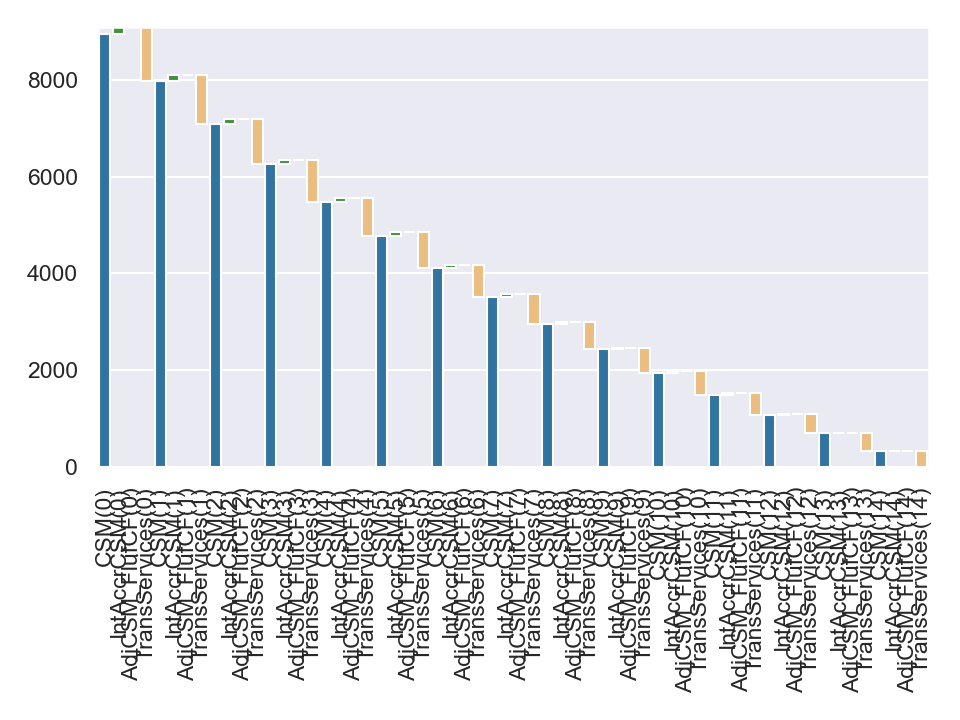

<AxesSubplot:>

In [6]:
draw_waterfall(df)